In [1]:
import numpy as np
import os
import pandas as pd
import yfinance as yf
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt

from model import fetchStockData, buildLookbackData, buildTensorData, buildRNN, plotPrediction, plotPredictionTest

tf.random.set_seed(13)

In [2]:
df = fetchStockData('BTC-USD', '2017-01-01', '2020-03-31')

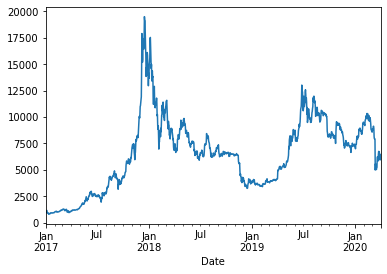

In [3]:
# Plot daily prices of Bitcoin
df['Close'].plot()

In [4]:
# Use 80% for training data
TRAIN_SPLIT = int(len(df) * 0.8)

# n day lookback
LOOKBACK = 14
# n day prediction
TARGET = 7
# n value batch
BATCH_SIZE = 25

# buffer - for shuffling, so memory doesnt overflow
BUFFER_SIZE = 10000

# For training
EVALS = 200
EPOCHS = 10

In [5]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [6]:
# Scale data
# Scale the data
df_features = df[['Close', 'Volume']]
scaled = (df_features-df_features.mean())/df_features.std()
scaled_values = scaled.values

# For later re-conversion
MEAN = df_features.mean()['Close']
STD = df_features.std()['Close']
MEAN_V = df_features.mean()['Volume']
STD_V = df_features.std()['Volume']

### Split Train and Test Data

In [7]:
x_train, y_train = buildLookbackData(scaled_values, 
                                     target = scaled_values[:, 0], 
                                     start_index = 0,
                                     end_index = TRAIN_SPLIT, 
                                     lookback = LOOKBACK,
                                     target_size = TARGET)

x_test, y_test = buildLookbackData(scaled_values, 
                                   target = scaled_values[:, 0],
                                   start_index = TRAIN_SPLIT, 
                                   end_index = None, 
                                   lookback = LOOKBACK,
                                   target_size = TARGET)

### Put Data Into Tensors

In [8]:
train_data, test_data = buildTensorData(x_train, y_train, x_test, y_test, BATCH_SIZE, BUFFER_SIZE)

### Build Model

In [11]:
model = buildRNN((LOOKBACK, 2), 200, 200, TARGET)

### Train Model

In [12]:
training_history = model.fit(train_data, 
                             epochs = EPOCHS,
                             steps_per_epoch = EVALS,
                             validation_data = test_data,
                             validation_steps = 50)

Epoch 1/10
200/200 [==============================] - 5s 23ms/step - loss: 0.2475 - val_loss: 0.1988
Epoch 2/10
200/200 [==============================] - 4s 22ms/step - loss: 0.1712 - val_loss: 0.1765
Epoch 3/10
200/200 [==============================] - 4s 22ms/step - loss: 0.1518 - val_loss: 0.1724
Epoch 4/10
200/200 [==============================] - 4s 22ms/step - loss: 0.1386 - val_loss: 0.2406
Epoch 5/10
200/200 [==============================] - 4s 22ms/step - loss: 0.1267 - val_loss: 0.2354
Epoch 6/10
200/200 [==============================] - 4s 22ms/step - loss: 0.1161 - val_loss: 0.3117
Epoch 7/10
200/200 [==============================] - 4s 22ms/step - loss: 0.1107 - val_loss: 0.2930
Epoch 8/10
200/200 [==============================] - 4s 21ms/step - loss: 0.1058 - val_loss: 0.4687
Epoch 9/10
200/200 [==============================] - 5s 23ms/step - loss: 0.1001 - val_loss: 0.3540
Epoch 10/10
200/200 [==============================] - 4s 22ms/step - loss: 0.0970 - val_lo

### Allow an arbitrary period of data

In [13]:
# Add in new data, not part of training/testing
df_new = fetchStockData('BTC-USD', '2020-04-01', '2020-05-11')[['Close', 'Volume']]
scaled_new = df_new.copy()
scaled_new['Close'] = (df_new['Close'] - MEAN) / STD
scaled_new['Volume'] = (df_new['Volume'] - MEAN_V) / STD_V

df_new = pd.concat([df[['Close', 'Volume']], df_new])
scaled_new = pd.concat([scaled, scaled_new])

<Figure size 432x288 with 0 Axes>

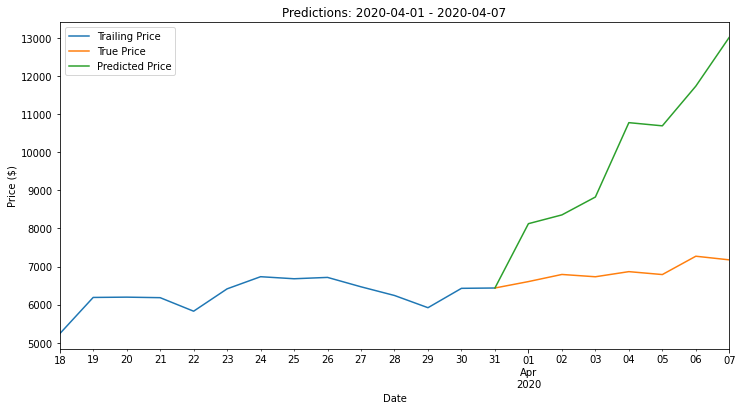

<Figure size 432x288 with 0 Axes>

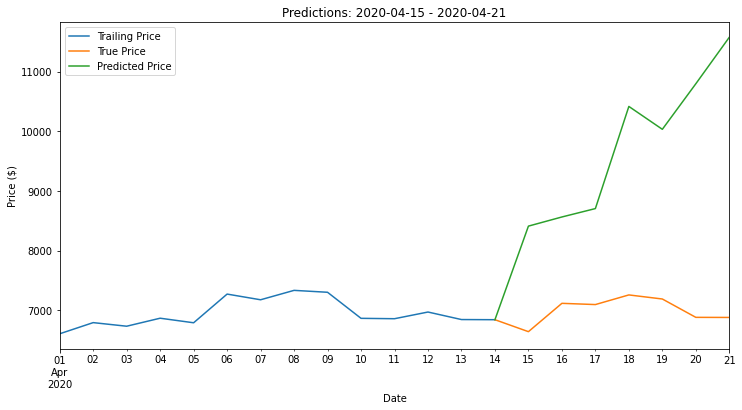

<Figure size 432x288 with 0 Axes>

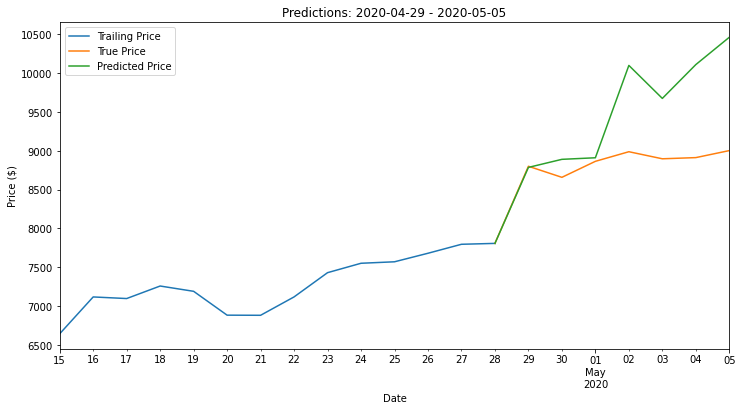

<Figure size 432x288 with 0 Axes>

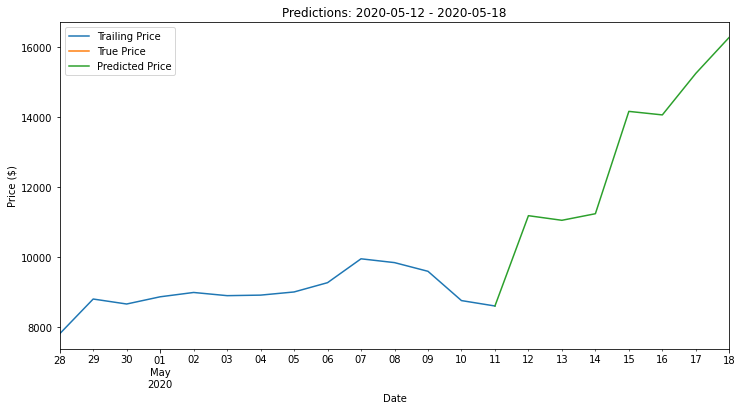

In [14]:
joined, predicted = plotPrediction(model, df_new, scaled_new, np.datetime64('2020-04-01'), 
                                         LOOKBACK, TARGET, MEAN, STD, instrument='Crypto')

joined, predicted = plotPrediction(model, df_new, scaled_new, np.datetime64('2020-04-15'), 
                                         LOOKBACK, TARGET, MEAN, STD, instrument='Crypto')

joined, predicted = plotPrediction(model, df_new, scaled_new, np.datetime64('2020-04-29'), 
                                         LOOKBACK, TARGET, MEAN, STD, instrument='Crypto')

joined, predicted = plotPrediction(model, df_new, scaled_new, np.datetime64('2020-05-12'), 
                                         LOOKBACK, TARGET, MEAN, STD, instrument='Crypto')